# **Project 35: Course Recommendation System**

***numpy*** : *Imports NumPy for numerical computing, especially for handling arrays and performing mathematical operations.*

***pandas*** : *Imports pandas for data manipulation and analysis, particularly with DataFrames.*

***seaborn*** : *Imports Seaborn for statistical data visualization, providing a high-level interface for drawing informative graphs.*

***matplotlib.pyplot*** : *Imports Matplotlib's pyplot module for creating static, animated, and interactive visualizations.*

***neattext.functions*** : *Imports NeatText functions for text cleaning and preprocessing tasks in natural language processing.*

***sklearn.feature_extraction.text TfidfVectorizer, CountVectorizer*** : *Imports tools for converting text data into numerical features using TF-IDF and count vectorization methods.*

***sklearn.metrics.pairwise cosine_similarity, linear_kernel*** : *Imports functions for calculating pairwise cosine similarity and linear kernel between vectors, often used in text and recommendation systems.*

***warnings*** : *Imports the warnings module to manage warning messages in Python code.*

**Imprting these libraries for Text Analytics, Text Preprocessing.**

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import warnings

**"!pip install neattext": Installs the neattext Python package, which provides tools for text cleaning and preprocessing.**

In [ ]:
!pip install neattext

**"warnings.simplefilter('ignore')"**: **Suppresses all warning messages in Python, preventing them from being displayed during code execution.**

In [121]:
warnings.simplefilter("ignore")

**"df = pd.read_csv('/content/udemy_course_data.csv')": Reads a CSV file into a DataFrame named df.**

**"df.head(5)": Displays the first 5 rows of the DataFrame df.**

In [122]:
df = pd.read_csv("/content/udemy_course_data.csv")
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


**"df.drop(columns=['published_date', 'published_timestamp', 'published_time', 'course_id'], inplace=True)": Removes the specified columns from the DataFrame df and updates it in place.**

**"df.head(5)": Displays the first 5 rows of the updated DataFrame df.**

In [123]:
df.drop(columns = ["published_date", "published_timestamp", "published_time","course_id"], inplace = True)
df.head(5)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,Business Finance,429400,2017,1,18
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,Business Finance,209400,2017,3,9
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance,97830,2016,12,19
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,Business Finance,232845,2017,5,30
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,Business Finance,255200,2016,12,13


**"len(df['course_title'].unique())": Counts the number of unique course titles in the DataFrame df.**

In [124]:
len(df["course_title"].unique())

3668

**"plt.figure(figsize=(15, 7))": Sets the figure size for the plot to 15x7 inches.**

**"sns.countplot(df['subject'], palette='plasma')": Creates a count plot of the subject column in the DataFrame df, using the 'plasma' color palette.**


**The graph displays the count of each subject. It shows that Web Development and Business Finance have approximately the same count, both around 1200.**

<Axes: xlabel='count', ylabel='subject'>

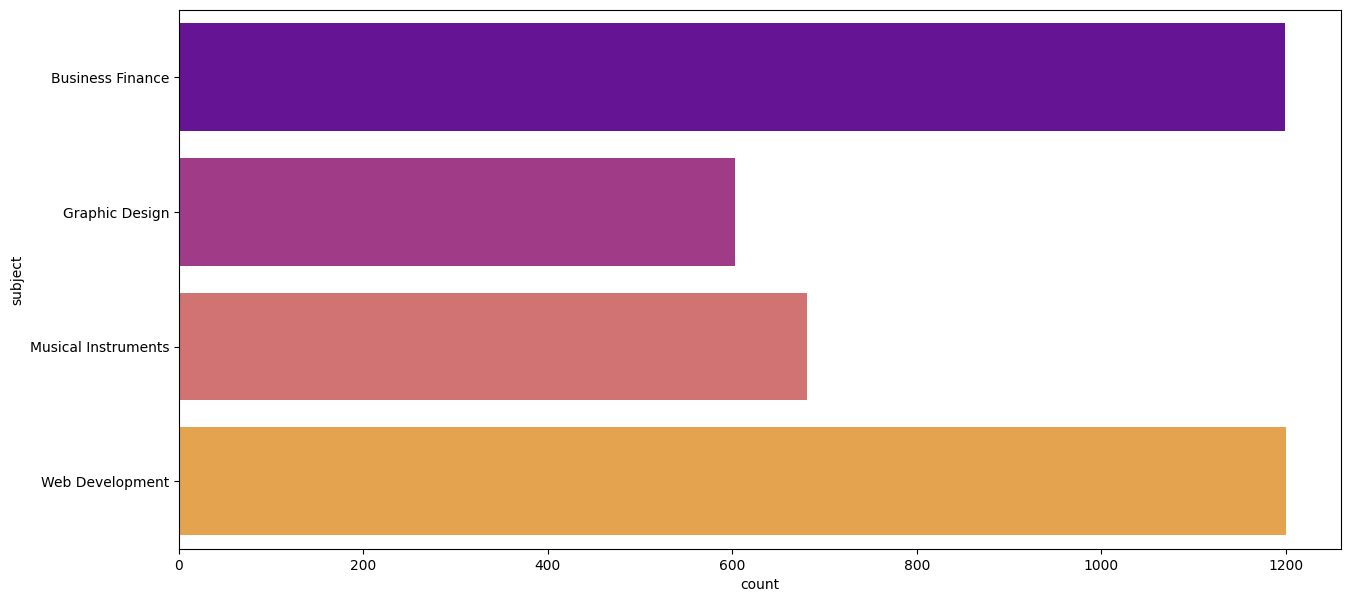

In [125]:
plt.figure(figsize = (15, 7))
sns.countplot(df["subject"], palette="plasma")

**plt.figure(figsize=(10, 5))": Sets the figure size for the plot to 10x5 inches.**

**"df['level'].value_counts().plot(kind='pie')": Creates a pie chart of the counts of unique values in the level column of the DataFrame df.**

**"plt.show()": Displays the pie chart.**

**The pie chart illustrates the distribution of levels from the "level" column. It reveals that the "All Levels" category constitutes approximately 50% of the chart, while the "Beginner" level is the second largest segment, representing about 35%.**

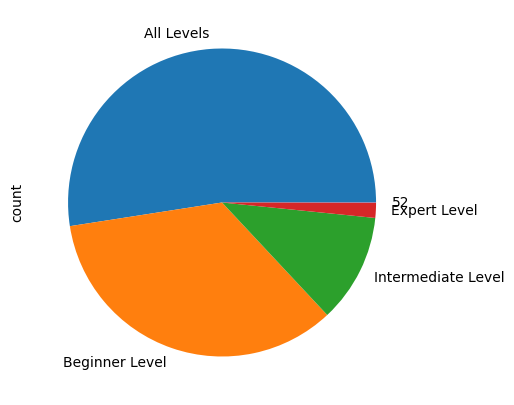

In [154]:
plt.figure(figsize=(10, 5))
df["level"].value_counts().plot(kind = "pie")
plt.show()

**"sns.countplot(x='is_paid', data=df, palette='plasma')": Creates a count plot of the is_paid column in the DataFrame df, using the 'plasma' color palette.**

**This graph illustrates the distribution of Udemy courses by payment status. "True" indicates paid courses, while "False" represents free courses. The graph shows that there are over 3,500 paid courses, compared to approximately 500 free courses.**

<Axes: xlabel='is_paid', ylabel='count'>

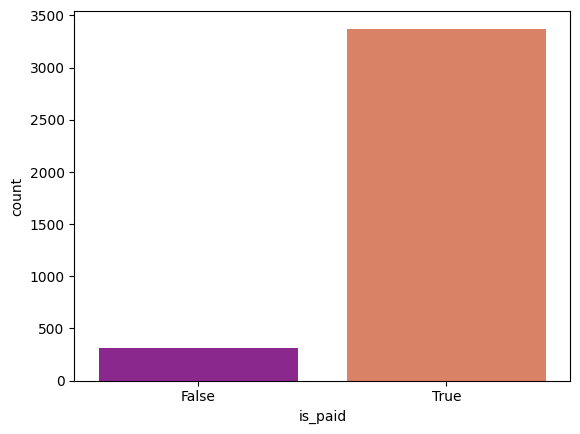

In [128]:
sns.countplot(x = 'is_paid',data=df,palette='plasma')

**"df['course_title'].iloc[1:5]": Displays the course_title values from rows 1 to 4 in the DataFrame df.**

In [129]:
df["course_title"].iloc[1:5]

,course_title
1,Complete GST Course & Certification - Grow You...
2,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...
4,How To Maximize Your Profits Trading Options


**"df['Clean_Title'] = df['course_title'].apply(nfx.remove_stopwords)": Removes stopwords from the course_title column and stores the cleaned titles in the Clean_Title column.**

**"df['Clean_Title'] = df['Clean_Title'].apply(nfx.remove_special_characters)": Removes special characters from the Clean_Title column.**

**"df['Clean_Title'].iloc[1:5]": Displays the Clean_Title values from rows 1 to 4 in the DataFrame df.**

In [130]:
df["Clean_Title"] = df["course_title"].apply(nfx.remove_stopwords)

df["Clean_Title"] = df["Clean_Title"].apply(nfx.remove_special_characters)

df["Clean_Title"].iloc[1:5]

,Clean_Title
1,Complete GST Course Certification Grow Practice
2,Financial Modeling Business Analysts Consultants
3,Beginner Pro Financial Analysis Excel 2017
4,Maximize Profits Trading Options


**"countvect = CountVectorizer()": Initializes a CountVectorizer object for converting a collection of text documents into a matrix of token counts.**

**"cv_mat = countvect.fit_transform(df['Clean_Title'])": Fits the CountVectorizer to the Clean_Title column in the DataFrame df and transforms the text data into a document-term matrix.**

**"cv_mat": Displays the resulting document-term matrix as a sparse matrix.**

In [131]:
countvect = CountVectorizer()

cv_mat = countvect.fit_transform(df["Clean_Title"])

cv_mat

<3683x3564 sparse matrix of type '<class 'numpy.int64'>'
	with 18364 stored elements in Compressed Sparse Row format>

**"cv_mat.todense()": Converts the sparse document-term matrix cv_mat into a dense matrix representation.**

In [132]:
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

**"df_cv_words = pd.DataFrame(cv_mat.todense(), columns=countvect.get_feature_names_out())": Converts the dense document-term matrix cv_mat into a DataFrame with columns named after the features (words) extracted by the CountVectorizer.**

**"df_cv_words": Displays the DataFrame df_cv_words showing the term frequencies for each document.**

In [133]:
df_cv_words = pd.DataFrame(cv_mat.todense(), columns = countvect.get_feature_names_out())

df_cv_words

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**"cosine_sim_mat = cosine_similarity(cv_mat)": Calculates the cosine similarity matrix for the document-term matrix cv_mat, measuring the similarity between each pair of documents.**

**"cosine_sim_mat": Displays the resulting cosine similarity matrix.**

In [134]:
cosine_sim_mat = cosine_similarity(cv_mat)

cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

**"course_index = pd.Series(df.index, index=df['course_title']).drop_duplicates()": Creates a Series with course_title as the index and corresponding row indices as values, while dropping any duplicate titles.**

In [135]:
course_index = pd.Series(df.index, index = df["course_title"]).drop_duplicates()

**"course_index": Displays the Series course_index that maps each unique course_title to its corresponding index in the DataFrame.**

In [136]:
course_index

,0
course_title,
Ultimate Investment Banking Course,0
Complete GST Course & Certification - Grow Your CA Practice,1
Financial Modeling for Business Analysts and Consultants,2
Beginner to Pro - Financial Analysis in Excel 2017,3
How To Maximize Your Profits Trading Options,4
...,...
Learn jQuery from Scratch - Master of JavaScript library,3678
How To Design A WordPress Website With No Coding At All,3679
Learn and Build using Polymer,3680


**"temp = df[df['Clean_Title'].str.contains('Python')]": Filters the DataFrame df to include only rows where the Clean_Title column contains the word "Python".**

**"temp.head()": Displays the first 5 rows of the filtered DataFrame temp.**

In [137]:
temp = df[df["Clean_Title"].str.contains("Python")]
temp.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day,Clean_Title
14,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7 hours,Business Finance,58800,2017,4,28,Python Algo Trading Sentiment Trading News
30,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5 hours,Business Finance,110675,2017,5,28,Python Algo Stock Trading Automate Trading
41,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5 hours,Business Finance,743145,2017,3,30,Python Finance Investment Fundamentals Data A...
149,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3 hours,Business Finance,90600,2017,3,14,Python Algo Trading FX Trading Oanda
336,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8 hours,Business Finance,20450,2016,4,12,Stock Technical Analysis Python


**"top6 = temp.sort_values(by='num_subscribers', ascending=False).head(6)": Sorts the filtered DataFrame temp by num_subscribers in descending order and selects the top 6 rows.**

**"top6": Displays the top 6 rows of the sorted DataFrame top6.**

In [138]:
top6 = temp.sort_values(by = "num_subscribers", ascending = False).head(6)

top6

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day,Clean_Title
2502,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4 hours,Web Development,1763350,2012,4,25,Web Programming Python
2575,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45 hours,Web Development,4565340,2013,4,8,Coding Entrepreneurs Learn Python Django More
2533,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5 hours,Web Development,1239980,2015,2,9,Learn Python Django Payment Processing
3205,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5 hours,Web Development,2366400,2017,2,24,Python Django Stack Web Developer Bootcamp
3512,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2 hours,Web Development,0,2015,6,9,Fun creative web engineering Python Web2py
2558,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11 hours,Web Development,1526265,2016,9,26,Complete Ethical Hacking Course 20 Python Kal...


**"df.drop(columns=['course_title'], inplace=True)": Removes the course_title column from the DataFrame df and updates it in place.**

In [139]:
df.drop(columns = ["course_title"], inplace = True)

**"index = course_index['How To Maximize Your Profits Trading Options']": Retrieves the index of the course titled "How To Maximize Your Profits Trading Options" from the course_index Series.**

In [140]:
index = course_index["How To Maximize Your Profits Trading Options"]

**"scores = list(enumerate(cosine_sim_mat[index]))": Creates a list of tuples where each tuple contains an index and the cosine similarity score for that index relative to the course at the specified index.**

In [141]:
scores = list(enumerate(cosine_sim_mat[index]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 1.0),
 (5, 0.20412414523193154),
 (6, 0.20412414523193154),
 (7, 0.1889822365046136),
 (8, 0.3779644730092272),
 (9, 0.0),
 (10, 0.20412414523193154),
 (11, 0.5),
 (12, 0.0),
 (13, 0.17677669529663687),
 (14, 0.35355339059327373),
 (15, 0.0),
 (16, 0.0),
 (17, 0.1889822365046136),
 (18, 0.22360679774997896),
 (19, 0.0),
 (20, 0.30151134457776363),
 (21, 0.20412414523193154),
 (22, 0.1889822365046136),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1889822365046136),
 (30, 0.35355339059327373),
 (31, 0.0),
 (32, 0.0),
 (33, 0.3779644730092272),
 (34, 0.0),
 (35, 0.3779644730092272),
 (36, 0.30151134457776363),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.5669467095138407),
 (44, 0.35355339059327373),
 (45, 0.0),
 (46, 0.35355339059327373),
 (47, 0.0),
 (48, 0.35355339059327373),
 (49, 0.4082482904638631),
 (50, 0.22360679774997896),
 (51, 0.0),
 (52, 0.1889822365046136),


**"sorted_score = sorted(scores, key=lambda x: x[1], reverse=True)": Sorts the scores list of tuples by the similarity score in descending order.**

**"sorted_score": Displays the sorted list of tuples, with each tuple containing an index and its corresponding similarity score.**

In [142]:
sorted_score = sorted(scores, key = lambda x:x[1], reverse = True)
sorted_score

[(4, 1.0),
 (410, 0.5773502691896258),
 (43, 0.5669467095138407),
 (96, 0.5303300858899106),
 (138, 0.5303300858899106),
 (195, 0.5303300858899106),
 (444, 0.5303300858899106),
 (803, 0.5303300858899106),
 (11, 0.5),
 (59, 0.5),
 (68, 0.5),
 (71, 0.5),
 (97, 0.5),
 (330, 0.5),
 (378, 0.5),
 (514, 0.5),
 (647, 0.5),
 (738, 0.5),
 (947, 0.5),
 (991, 0.5),
 (811, 0.45226701686664544),
 (66, 0.4472135954999579),
 (222, 0.4472135954999579),
 (234, 0.4472135954999579),
 (369, 0.4472135954999579),
 (439, 0.4472135954999579),
 (463, 0.4472135954999579),
 (766, 0.4472135954999579),
 (829, 0.4472135954999579),
 (399, 0.4330127018922194),
 (49, 0.4082482904638631),
 (54, 0.4082482904638631),
 (72, 0.4082482904638631),
 (85, 0.4082482904638631),
 (107, 0.4082482904638631),
 (160, 0.4082482904638631),
 (167, 0.4082482904638631),
 (205, 0.4082482904638631),
 (295, 0.4082482904638631),
 (353, 0.4082482904638631),
 (402, 0.4082482904638631),
 (411, 0.4082482904638631),
 (802, 0.4082482904638631),
 (95

**"sorted_indices = [i[0] for i in sorted_score[1:]]": Extracts the indices from the sorted_score list, excluding the first item, and stores them in sorted_indices.**

**"sorted_values = [i[1] for i in sorted_score[1:]]": Extracts the similarity scores from the sorted_score list, excluding the first item, and stores them in sorted_values.**

**"sorted_values": Displays the list of similarity scores in descending order, excluding the first item.**

In [143]:
sorted_indices = [i[0] for i in sorted_score[1:]]

sorted_values = [i[0] for i in sorted_score[1:]]

sorted_values

[410,
 43,
 96,
 138,
 195,
 444,
 803,
 11,
 59,
 68,
 71,
 97,
 330,
 378,
 514,
 647,
 738,
 947,
 991,
 811,
 66,
 222,
 234,
 369,
 439,
 463,
 766,
 829,
 399,
 49,
 54,
 72,
 85,
 107,
 160,
 167,
 205,
 295,
 353,
 402,
 411,
 802,
 953,
 956,
 1002,
 8,
 33,
 35,
 102,
 109,
 113,
 157,
 186,
 363,
 434,
 510,
 650,
 798,
 900,
 14,
 30,
 44,
 46,
 48,
 75,
 89,
 149,
 153,
 200,
 346,
 361,
 366,
 377,
 416,
 451,
 471,
 566,
 628,
 708,
 794,
 864,
 909,
 954,
 963,
 1023,
 1112,
 1115,
 1134,
 1136,
 1141,
 1151,
 62,
 315,
 618,
 683,
 20,
 36,
 201,
 398,
 709,
 99,
 108,
 118,
 302,
 387,
 403,
 468,
 477,
 479,
 538,
 583,
 648,
 652,
 745,
 777,
 823,
 833,
 844,
 863,
 883,
 948,
 962,
 1005,
 1089,
 1171,
 256,
 67,
 77,
 78,
 84,
 88,
 135,
 144,
 164,
 208,
 284,
 299,
 320,
 350,
 356,
 394,
 408,
 429,
 448,
 493,
 500,
 533,
 559,
 570,
 598,
 694,
 696,
 764,
 769,
 815,
 921,
 1012,
 1021,
 1135,
 18,
 50,
 79,
 90,
 141,
 187,
 188,
 196,
 221,
 233,
 248,
 2

**"recommended_result_df = df.iloc[sorted_indices]": Retrieves rows from the DataFrame df using the indices in sorted_indices, which are the top recommendations based on similarity scores.**

**"recommended_result_df": Displays the DataFrame containing the recommended courses.**

In [144]:
recommended_result_df = df.iloc[sorted_values]

recommended_result_df

,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day,Clean_Title
410,https://www.udemy.com/trading-options-basics/,True,200,8,0,8,Beginner Level,1.5 hours,Business Finance,1600,2016,7,1,Trading Options Basics
43,https://www.udemy.com/work-from-home-setup-you...,True,115,7489,1190,25,Intermediate Level,1 hour,Business Finance,861235,2015,10,22,Options Trading Win Weekly Options
96,https://www.udemy.com/intermediate-options-tra...,True,40,2000,30,9,All Levels,1 hour,Business Finance,80000,2015,4,13,Intermediate Options trading concepts Stocks O...
138,https://www.udemy.com/forexoptions/,True,200,611,4,26,Beginner Level,1 hour,Business Finance,122200,2017,6,7,Forex Trading Fixed Risk Options Trading
195,https://www.udemy.com/trading-options-for-income/,False,0,4077,281,20,Beginner Level,1.5 hours,Business Finance,0,2016,8,18,Trading Options Consistent Returns Options Basics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,Web Development,104000,2016,6,14,Learn jQuery Scratch Master JavaScript library
3679,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,Web Development,7650,2017,3,10,Design WordPress Website Coding
3680,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,Web Development,20520,2015,12,30,Learn Build Polymer
3681,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,Web Development,15000,2016,8,11,CSS Animations Create Amazing Effects Website


**"recommended_result_df['Similarity_Score'] = np.array(sorted_values)": Adds a new column Similarity_Score to the DataFrame recommended_result_df, containing the similarity scores from sorted_values.**

**"recommended_result_df": Displays the updated DataFrame with the added Similarity_Score column.**

In [145]:
recommended_result_df["Similarity_Score"] = np.array(sorted_values)

recommended_result_df

,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day,Clean_Title,Similarity_Score
410,https://www.udemy.com/trading-options-basics/,True,200,8,0,8,Beginner Level,1.5 hours,Business Finance,1600,2016,7,1,Trading Options Basics,410
43,https://www.udemy.com/work-from-home-setup-you...,True,115,7489,1190,25,Intermediate Level,1 hour,Business Finance,861235,2015,10,22,Options Trading Win Weekly Options,43
96,https://www.udemy.com/intermediate-options-tra...,True,40,2000,30,9,All Levels,1 hour,Business Finance,80000,2015,4,13,Intermediate Options trading concepts Stocks O...,96
138,https://www.udemy.com/forexoptions/,True,200,611,4,26,Beginner Level,1 hour,Business Finance,122200,2017,6,7,Forex Trading Fixed Risk Options Trading,138
195,https://www.udemy.com/trading-options-for-income/,False,0,4077,281,20,Beginner Level,1.5 hours,Business Finance,0,2016,8,18,Trading Options Consistent Returns Options Basics,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,Web Development,104000,2016,6,14,Learn jQuery Scratch Master JavaScript library,3678
3679,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,Web Development,7650,2017,3,10,Design WordPress Website Coding,3679
3680,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,Web Development,20520,2015,12,30,Learn Build Polymer,3680
3681,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,Web Development,15000,2016,8,11,CSS Animations Create Amazing Effects Website,3681


**use_df = recommended_result_df[['Clean_Title', 'Similarity_Score']]": Creates a new DataFrame use_df with only the Clean_Title and Similarity_Score columns from recommended_result_df.**

**"use_df": Displays the DataFrame containing only the course titles and their similarity scores.**

In [146]:
use_df = recommended_result_df[["Clean_Title", "Similarity_Score"]]

use_df

,Clean_Title,Similarity_Score
410,Trading Options Basics,410
43,Options Trading Win Weekly Options,43
96,Intermediate Options trading concepts Stocks O...,96
138,Forex Trading Fixed Risk Options Trading,138
195,Trading Options Consistent Returns Options Basics,195
...,...,...
3678,Learn jQuery Scratch Master JavaScript library,3678
3679,Design WordPress Website Coding,3679
3680,Learn Build Polymer,3680
3681,CSS Animations Create Amazing Effects Website,3681


**The code defines a function recommend_course that recommends courses similar to a given title based on cosine similarity. It creates a mapping of course titles to indices, calculates similarity scores, and sorts them to find the most similar courses. The function then returns a DataFrame with details of the top recommended courses, including their titles, similarity scores, URLs, prices, and number of subscribers.**

In [147]:
def recommend_course(title, numrec = 10):

    course_index = pd.Series(df.index, index=df["Clean_Title"]).drop_duplicates()

    index = course_index[title]

    scores = list(enumerate(cosine_sim_mat[index]))

    sorted_scores = sorted(scores, key=lambda x: x[1], reverse = True)

    selected_course_index = [i[0] for i in sorted_scores[1:]]

    selected_course_score = [i[0] for i in sorted_scores[1:]]

    rec_df = df.iloc[selected_course_index]

    rec_df["Similarity_Score"] = selected_course_score

    final_recommended_course = rec_df[["Clean_Title", "Similarity_Score", "url", "price", "num_subscribers"]]

    return final_recommended_course.head(numrec)

ans = recommend_course("Trading Options Basics", 20)

ans

,Clean_Title,Similarity_Score,url,price,num_subscribers
97,Options Trading 101 Basics,97,https://www.udemy.com/options-trading-101-the-...,0,1514
195,Trading Options Consistent Returns Options Basics,195,https://www.udemy.com/trading-options-for-income/,0,4077
864,Basics Trading,864,https://www.udemy.com/basicsoftrading/,40,99
66,Options Trading Basics 3Course Bundle,66,https://www.udemy.com/learn-options-trading-co...,180,10100
802,Trading Basics Trading Beginners,802,https://www.udemy.com/money-basics-of-trading-...,140,1309
956,Options Basics Trading Small Capital Level 1,956,https://www.udemy.com/options-basics-trading-w...,30,120
43,Options Trading Win Weekly Options,43,https://www.udemy.com/work-from-home-setup-you...,115,7489
96,Intermediate Options trading concepts Stocks O...,96,https://www.udemy.com/intermediate-options-tra...,40,2000
138,Forex Trading Fixed Risk Options Trading,138,https://www.udemy.com/forexoptions/,200,611
444,Advantages ETF Options Index Options Trading,444,https://www.udemy.com/learn-etf-options-and-in...,60,52


**"ans.shape": Displays the shape of the DataFrame ans, showing the number of rows and columns in the recommended courses DataFrame.**

In [148]:
ans.shape

(20, 5)

**"ans.columns": Displays the column names in the DataFrame ans, showing the attributes included in the recommended courses.**

In [149]:
ans.columns

Index(['Clean_Title', 'Similarity_Score', 'url', 'price', 'num_subscribers'], dtype='object')

**"df.head(5)": Displays the first 5 rows of the DataFrame df, showing a preview of its contents.**

In [150]:
df.head(5)

,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month,day,Clean_Title
0,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,Business Finance,429400,2017,1,18,Ultimate Investment Banking Course
1,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,Business Finance,209400,2017,3,9,Complete GST Course Certification Grow Practice
2,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance,97830,2016,12,19,Financial Modeling Business Analysts Consultants
3,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,Business Finance,232845,2017,5,30,Beginner Pro Financial Analysis Excel 2017
4,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,Business Finance,255200,2016,12,13,Maximize Profits Trading Options


**"df.to_csv('traineddata.csv', index=False)": Saves the DataFrame df to a CSV file named traineddata.csv without including the index column.**

In [ ]:
df.to_csv('traineddata.csv', index = False)